# EDA

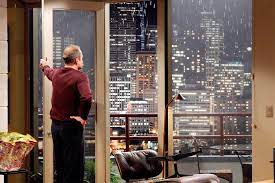

In [1092]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [1093]:
df_import = pd.read_csv('data/King_County_House_prices_dataset.csv')
df_import.shape

(21597, 21)

In [1094]:
 df_import.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [1095]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [1096]:
df_import.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [1097]:
df_import['date'] = pd.to_datetime(df_import['date'], format='%m/%d/%Y')  #%Y/%m/%d  we should arrage the date according to arrage of was come  in origin data

In [1098]:
df_import['sold_year'] = df_import['date'].dt.year
df_import['sold_month'] = df_import['date'].dt.month
df_import['sold_day'] = df_import['date'].dt.dayofweek  # extract day of week by (Monday is represented by 0, Tuesday by 1, and so on),


In [1099]:
df_import.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
sold_year                 int64
sold_month                int64
sold_day                  int64
dtype: object

In [1100]:
type(df_import['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [1101]:

# Create a new variable 'new_renovate'  based on conditions when value = 0 set "no" , else set ="yes" when value Nan="NaN"
df_import['new_renovate'] = np.where(np.isnan(df_import['yr_renovated']), "NA",
                                                            np.where(df_import['yr_renovated'] == 0, "Not Renovated", "Renovated"))


In [1102]:
df_import['Age_house'] = 2016 - df_import['yr_built']


In [1103]:
df_import['new_id'] = df_import['id'].duplicated()

In [1047]:
df_import = df_import.drop(columns='is_duplicated')  # when run this code and column already drop will get error 

KeyError: "['is_duplicated'] not found in axis"

In [1104]:
df_import.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,sold_day,Age_house
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,...,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,...,83.637,98077.952,47.560,-122.214,1986.620,12758.284,2014.323,6.574,2.011,45.000
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,...,399.946,53.513,0.139,0.141,685.230,27274.442,0.468,3.115,1.461,29.375
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,...,0.000,98001.000,47.156,-122.519,399.000,651.000,2014.000,1.000,0.000,1.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,...,0.000,98033.000,47.471,-122.328,1490.000,5100.000,2014.000,4.000,1.000,19.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,...,0.000,98065.000,47.572,-122.231,1840.000,7620.000,2014.000,6.000,2.000,41.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,...,0.000,98118.000,47.678,-122.125,2360.000,10083.000,2015.000,9.000,3.000,65.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,...,2015.000,98199.000,47.778,-121.315,6210.000,871200.000,2015.000,12.000,6.000,116.000


In [1105]:
# check for duplicate rows in video_id column
df_import["id"].duplicated().value_counts()




False    21420
True       177
Name: id, dtype: int64

In [1107]:
duplicated = df_import["id"].duplicated().value_counts().reset_index()
duplicated 

,index,id
0,False,21420
1,True,177


In [1108]:
df_import['new_id'].replace({True: "Sale more Than one", False: "Sale equal only one "}, inplace=True)


In [1109]:
df_import.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,sold_day,new_renovate,Age_house,new_id
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,47.511,-122.257,1340,5650,2014,10,0,Not Renovated,61,Sale equal only one
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,47.721,-122.319,1690,7639,2014,12,1,Renovated,65,Sale equal only one
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,47.738,-122.233,2720,8062,2015,2,2,NA,83,Sale equal only one
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,47.521,-122.393,1360,5000,2014,12,1,Not Renovated,51,Sale equal only one
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,47.617,-122.045,1800,7503,2015,2,2,Not Renovated,29,Sale equal only one


In [1110]:
df_import['new_id'].value_counts()  # reviw 

Sale equal only one     21420
Sale more Than one        177
Name: new_id, dtype: int64

In [1111]:
df_import.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
sold_year           0
sold_month          0
sold_day            0
new_renovate        0
Age_house           0
new_id              0
dtype: int64

In [1112]:
value_2=df_import['yr_renovated'].isna().sum()/len(df_import['yr_renovated'])*100
print(f"percent of = {value_2.round(2)} %")

percent of = 17.79 %


In [1113]:
value_2=df_import['waterfront'].isna().sum()/len(df_import['waterfront'])*100
print(f"percent of = {value_2.round(2)} %")

percent of = 11.0 %


In [1114]:
value_2=df_import['view'].isna().sum()/len(df_import['view'])*100
print(f"percent of = {value_2.round(2)} %")

percent of = 0.29 %


In [1115]:
df_import['yr_renovated'].value_counts()

0.000       17011
2014.000       73
2013.000       31
2003.000       31
2007.000       30
            ...  
1951.000        1
1953.000        1
1946.000        1
1976.000        1
1948.000        1
Name: yr_renovated, Length: 70, dtype: int64

In [1116]:
grouped_data = df_import.groupby('id').agg({'sold_year': ['count']}).reset_index()
grouped_data


,id,sold_year
,,count
0,1000102,2
1,1200019,1
2,1200021,1
3,2800031,1
4,3600057,1
...,...,...
21415,9842300095,1
21416,9842300485,1
21417,9842300540,1


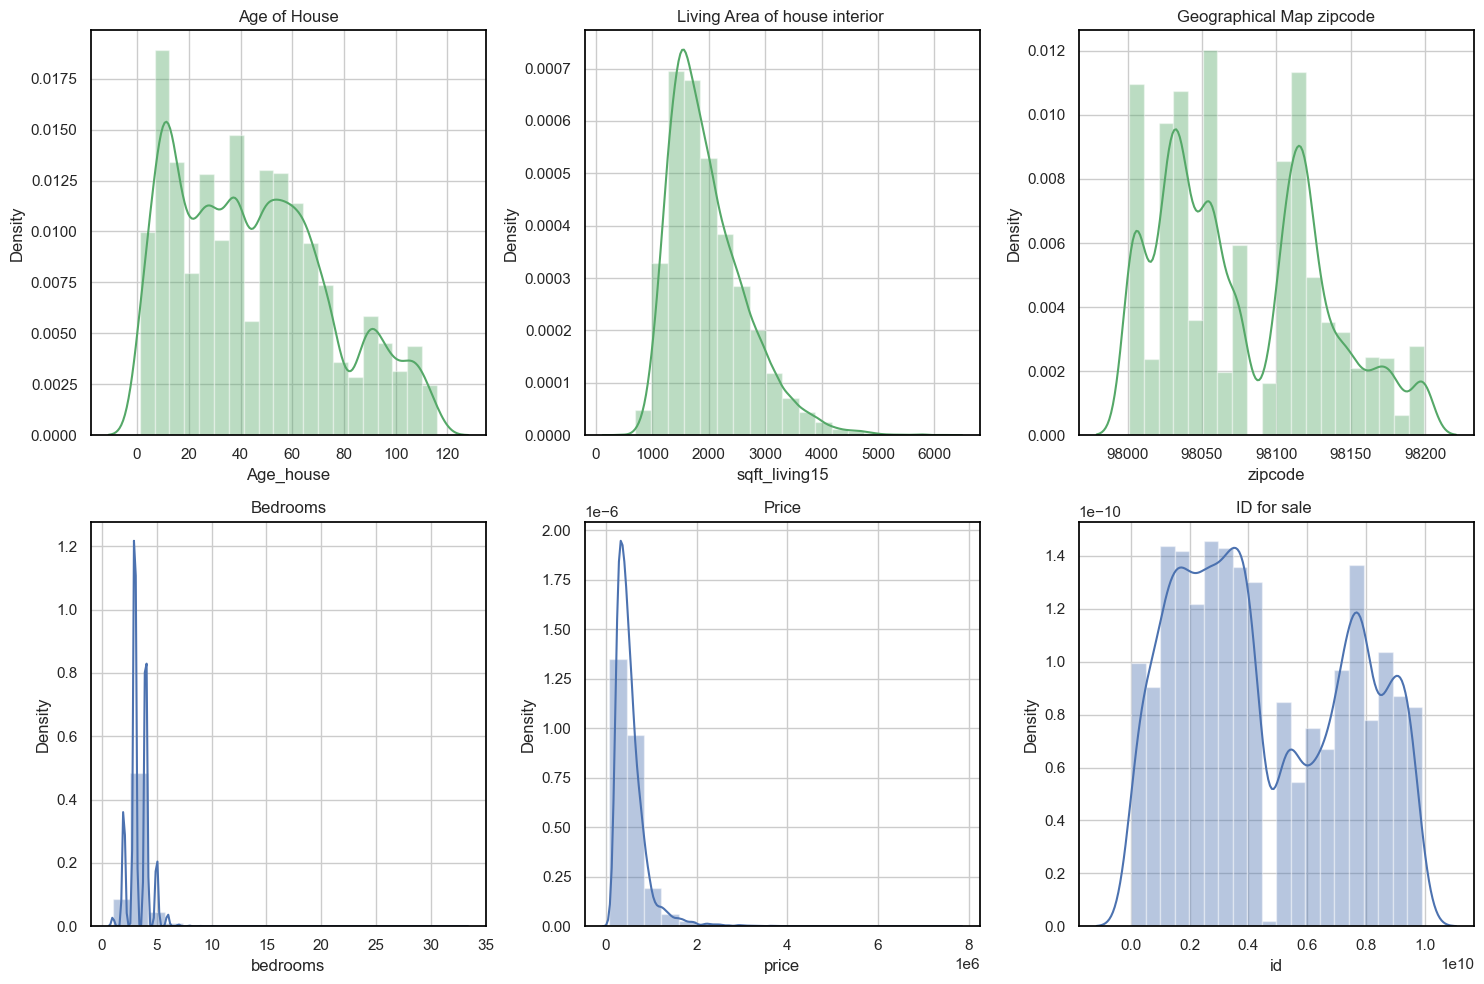

In [1117]:
#df_num = df_import[['id', 'price', 'bedrooms', 'sqft_living', 'zipcode','sqft_living15','new_renovate','Age_house']]

# Create a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot the first histogram
sns.distplot(df_import['Age_house'], color='g', bins=20, hist_kws={'alpha': 0.4}, ax=axes[0, 0])
axes[0, 0].set_title('Age of House')

# Plot the second histogram
sns.distplot(df_import['sqft_living15'], color='g', bins=20, hist_kws={'alpha': 0.4}, ax=axes[0, 1])
axes[0, 1].set_title('Living Area of house interior ')

# Plot the third histogram
sns.distplot(df_import['zipcode'], color='g', bins=20, hist_kws={'alpha': 0.4}, ax=axes[0, 2])
axes[0, 2].set_title('Geographical Map zipcode')

# Plot the fourth histogram
sns.distplot(df_import['bedrooms'], color='b', bins=20, hist_kws={'alpha': 0.4}, ax=axes[1, 0])
axes[1, 0].set_title('Bedrooms')

# Plot the fifth histogram
sns.distplot(df_import['price'], color='b', bins=20, hist_kws={'alpha': 0.4}, ax=axes[1, 1])
axes[1, 1].set_title('Price')

# Plot the sixth histogram
sns.distplot(df_import['id'], color='b', bins=20, hist_kws={'alpha': 0.4}, ax=axes[1, 2])
axes[1, 2].set_title('ID for sale ')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()



In [1149]:
 #renovate_data_filtered = renovate_data.loc[renovate_data.index != 'NA'] #df_filtered = df_import[df_import['new_renovate'] != 'NA']  another way
df_filtered = df_import[df_import['new_renovate'] != 'NA'] 
renovate_data = df_filtered.groupby('new_renovate')['price'].mean()
renovate_data.reset_index()

,new_renovate,price
0,Not Renovated,530677.536
1,Renovated,768901.892


In [1159]:
import plotly.express as px

df_filtered = df_import[df_import['new_renovate'] != 'NA'] 
renovate_data = df_filtered.groupby('new_renovate')['price'].mean().reset_index()

fig = px.bar(renovate_data, x='new_renovate', y='price')

fig.update_layout(
    title='Renovated House Vs Price of House',
    xaxis_title=None,
    yaxis_title='Mean price for House',
    font=dict(size=14),
    showlegend=False,
    width=800,
    height=600
)

fig.update_traces(
    texttemplate='%{y:.0f}',
    textposition='outside'
)

fig.show()



In [1160]:
#df_import['new_renovate'].value_counts()

In [1133]:
import numpy as np

# Filter out rows with 'NA' in the 'new_renovate' column
#renovate_data_filtered = renovate_data[renovate_data['new_renovate'] != 'NA']
#renovate_data_filtered

In [997]:
renovate_data = df_import.groupby('new_renovate')['Age_house'].count().reset_index()
renovate_data

,new_renovate,Age_house
0,NA,3842
1,Not Renovated,17011
2,Renovated,744


In [1161]:
from scipy.stats import ttest_ind

# Assuming df_y and df_n are your DataFrames containing the 'price' column for two groups

# Extract the 'price' columns for each group
price_y = df_y['price']
price_n = df_n['price']

# Perform the t-test
t_stat, p_value = ttest_ind(price_y, price_n)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 17.367746402729818
P-value: 5.183876665828538e-67


In [1165]:
import plotly.express as px

# Filter out rows with 'NA' in the 'new_renovate' column

df_filtered = df_import[df_import['new_renovate'] != 'NA'] 
renovate_data = df_filtered.groupby('new_renovate')['Age_house'].mean().reset_index()

fig = px.bar(renovate_data, x='new_renovate', y='Age_house')

fig.update_layout(
    title='Renovated House VS Mean of Age houses',
    xaxis_title=None,
    yaxis_title='Mean Age for House ',
    font=dict(size=14),
    showlegend=False,
    width=800,  # Set the width of the layout (in pixels)
    height=600  # Set the height of the layout (in pixels)
)

fig.update_traces(
    texttemplate='%{y:.0f}',
    textposition='outside'
)

fig.show()


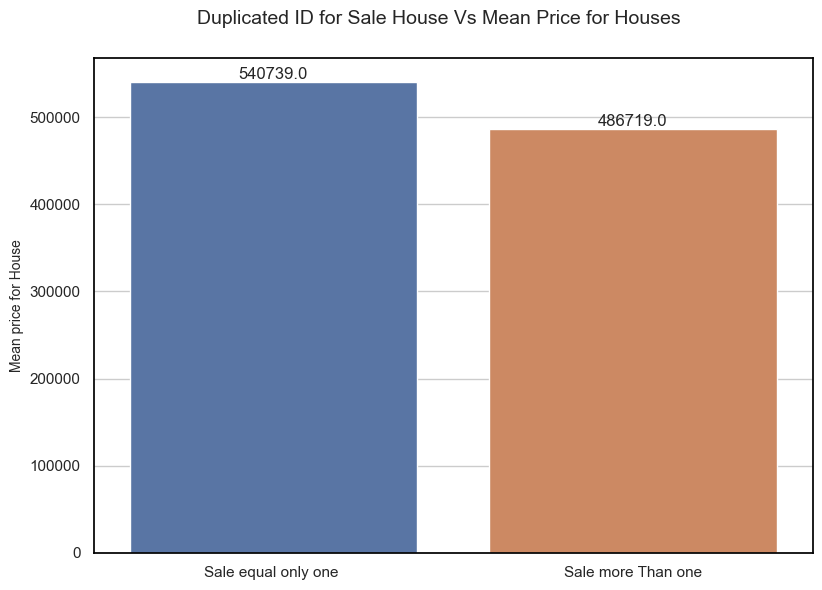

In [1166]:
renovate_data = df_import.groupby('new_id')['price'].mean().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
plt.suptitle('Duplicated ID for Sale House Vs Mean Price for Houses ', fontsize=14)
fig.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.2, top=0.9)

f1 = sns.barplot(x=renovate_data['new_id'], y=renovate_data['price'])

for index, row in renovate_data.iterrows():
    label = round(row['price'], 0)  # Round the label value to the nearest whole number
    f1.annotate(label, xy=(row.name, row['price']), ha='center', va='bottom')

f1.tick_params(axis='x', labelrotation=0)
f1.set(xlabel=None)
f1.set_ylabel("Mean price for House", fontsize=10)
f1.set_title("", fontsize=15)

plt.show()

In [ ]:
df_import['new_id'].value_counts()

Sale equal only one     21420
Sale more Than one        177
Name: new_id, dtype: int64

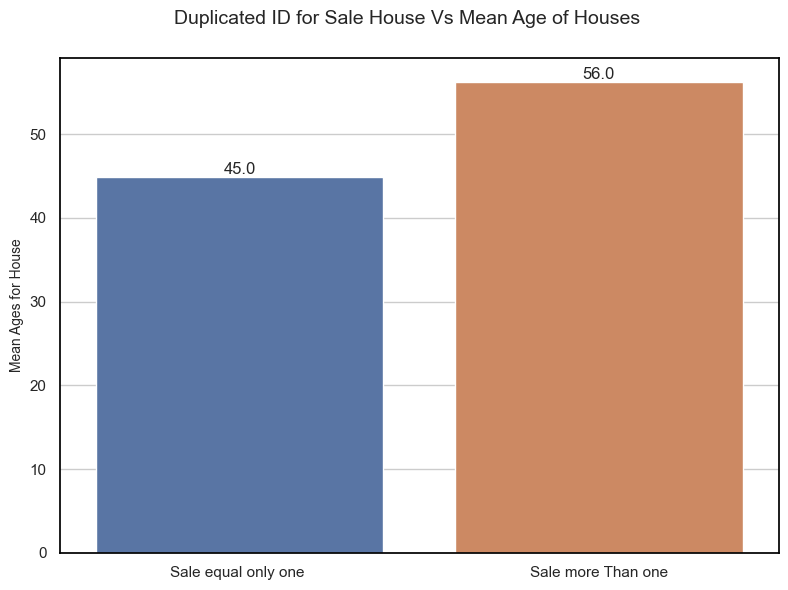

In [1167]:
renovate_data = df_import.groupby('new_id')['Age_house'].mean().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
plt.suptitle('Duplicated ID for Sale House Vs Mean Age of Houses', fontsize=14)
fig.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.2, top=0.9)

f1 = sns.barplot(x=renovate_data['new_id'], y=renovate_data['Age_house'])

for index, row in renovate_data.iterrows():
    label = round(row['Age_house'], 0)  # Round the label value to the nearest whole number
    f1.annotate(label, xy=(row.name, row['Age_house']), ha='center', va='bottom')

f1.tick_params(axis='x', labelrotation=0)
f1.set(xlabel=None)
f1.set_ylabel("Mean Ages for House", fontsize=10)
f1.set_title("", fontsize=15)

plt.show()

In [1168]:
renovate_data = df_import.groupby('new_id')['Age_house'].count().reset_index()
renovate_data

,new_id,Age_house
0,Sale equal only one,21420
1,Sale more Than one,177


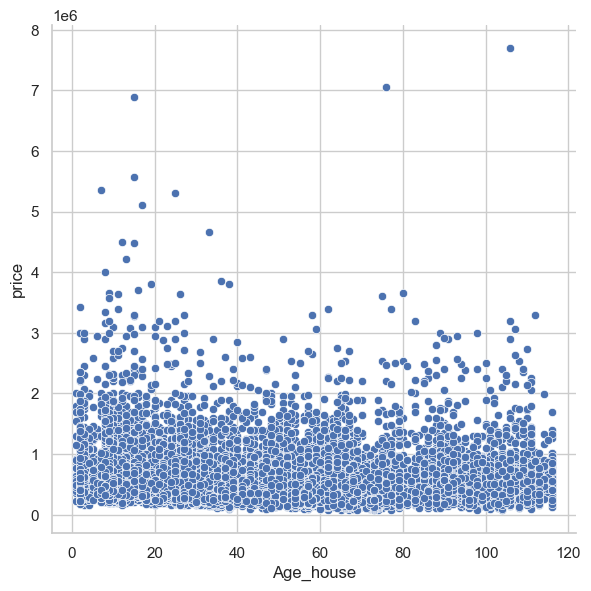

In [ ]:

sns.set(style="whitegrid")
# Create the pairplot with the adjusted height
sns.pairplot(data=df_import, x_vars= ['Age_house'], y_vars=['price'], height=6)

# Show the plot
plt.show()


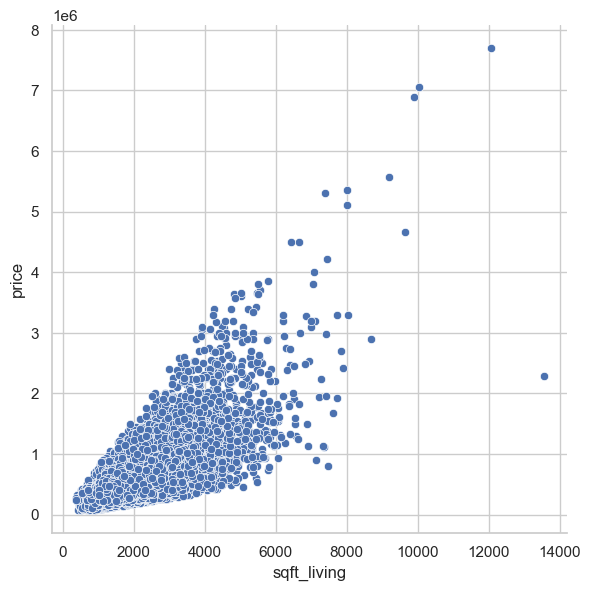

In [ ]:

sns.set(style="whitegrid")
# Create the pairplot with the adjusted height
sns.pairplot(data=df_import, x_vars= ['sqft_living'], y_vars=['price'], height=6)

# Show the plot
plt.show()


In [ ]:
all_1=df_import.groupby(df_import['sold_year'])
all_1['id','sold_month'].count().reset_index()

,sold_year,id,sold_month
0,2014,14622,14622
1,2015,6975,6975


In [ ]:
# grouped_data = df_import.groupby('zipcode')['price'].mean() ['lat']
# grouped_data.reset_index()
grouped_data = df_import.groupby('zipcode')['price','lat','long'].mean()
grouped_data.reset_index()


,zipcode,price,lat,long
0,98001,281194.870,47.309,-122.271
1,98002,234284.035,47.309,-122.213
2,98003,294111.279,47.316,-122.310
3,98004,1356523.991,47.616,-122.205
4,98005,810289.696,47.612,-122.167
...,...,...,...,...
65,98177,676419.392,47.742,-122.369
66,98178,310612.756,47.499,-122.247
67,98188,289078.346,47.447,-122.281
68,98198,302896.739,47.391,-122.316


In [ ]:
grouped_data=  df_import.groupby('zipcode')['price'].mean().reset_index()
grouped_data[['zipcode', 'price']]

,zipcode,price
0,98001,281194.870
1,98002,234284.035
2,98003,294111.279
3,98004,1356523.991
4,98005,810289.696
...,...,...
65,98177,676419.392
66,98178,310612.756
67,98188,289078.346
68,98198,302896.739


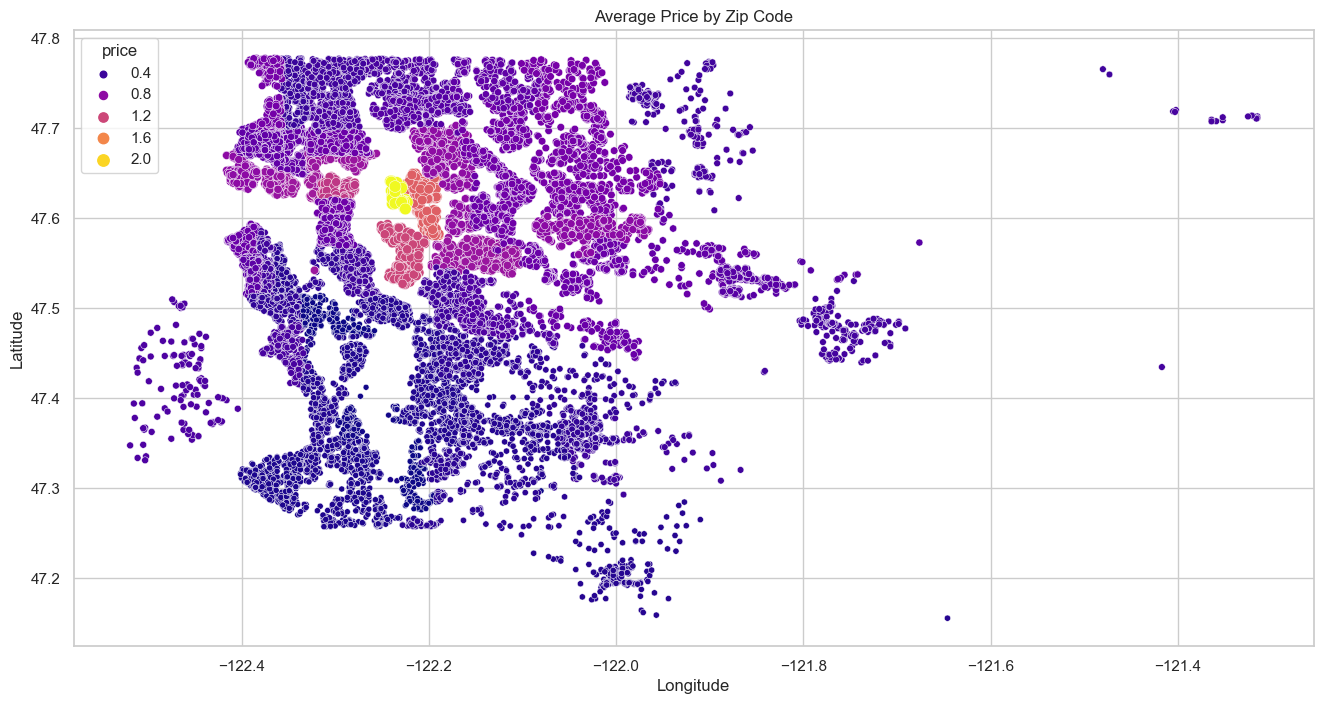

In [ ]:
# Assuming df_import is your DataFrame containing zip code, latitude, and longitude columns
grouped_data = df_import.groupby('zipcode')['price'].mean().reset_index()

merged_data = grouped_data[['zipcode', 'price']].merge(df_import[['zipcode', 'lat', 'long']], on='zipcode').drop_duplicates()

# Set the figure size
fig, ax = plt.subplots(figsize=(16, 8))

# Use scatter plot with seaborn
sns.scatterplot(data=merged_data, x='long', y='lat', hue='price', size='price', palette='plasma', ax=ax)

# Set the title and labels
ax.set_title('Average Price by Zip Code')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


In [1030]:
import plotly.express as px

# Assuming df_import is your DataFrame containing zip code, latitude, and longitude columns
grouped_data = df_import.groupby('zipcode')['price'].mean().reset_index()

merged_data = grouped_data[['zipcode', 'price']].merge(df_import[['zipcode', 'lat', 'long']], on='zipcode').drop_duplicates()

fig = px.scatter_mapbox(merged_data, lat='lat', lon='long', hover_data=['zipcode', 'price'], color='price')
fig.update_layout(mapbox_style='carto-positron')
fig.show()


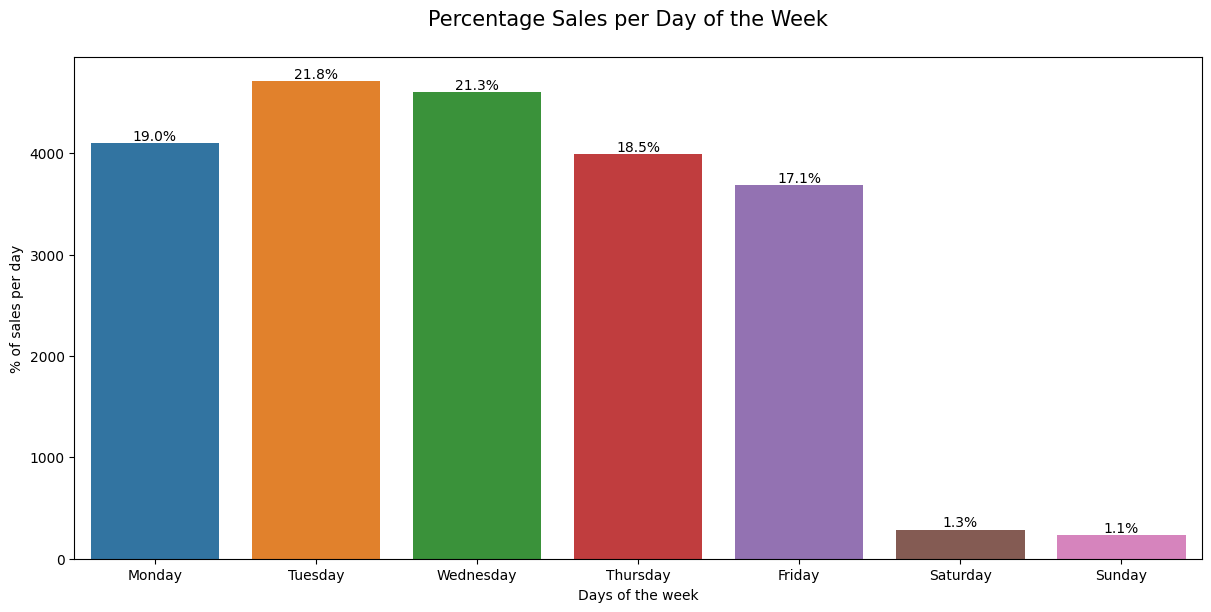

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.suptitle('Percentage Sales per Day of the Week', fontsize=15)
fig.tight_layout(h_pad=8)
plt.subplots_adjust(hspace=.5, wspace=.2, top=.9)

f1 = sns.countplot(x=df_import['sold_day'])
f1.set_ylabel("% of sales per day", fontsize=10)
f1.set_xlabel("Days of the week", fontsize=10)
f1.set_xticks([0, 1, 2, 3, 4, 5, 6])
f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Calculate the total count


# Add labels with percentage values on top of each bar
for p in f1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_import['sold_day']))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    f1.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()



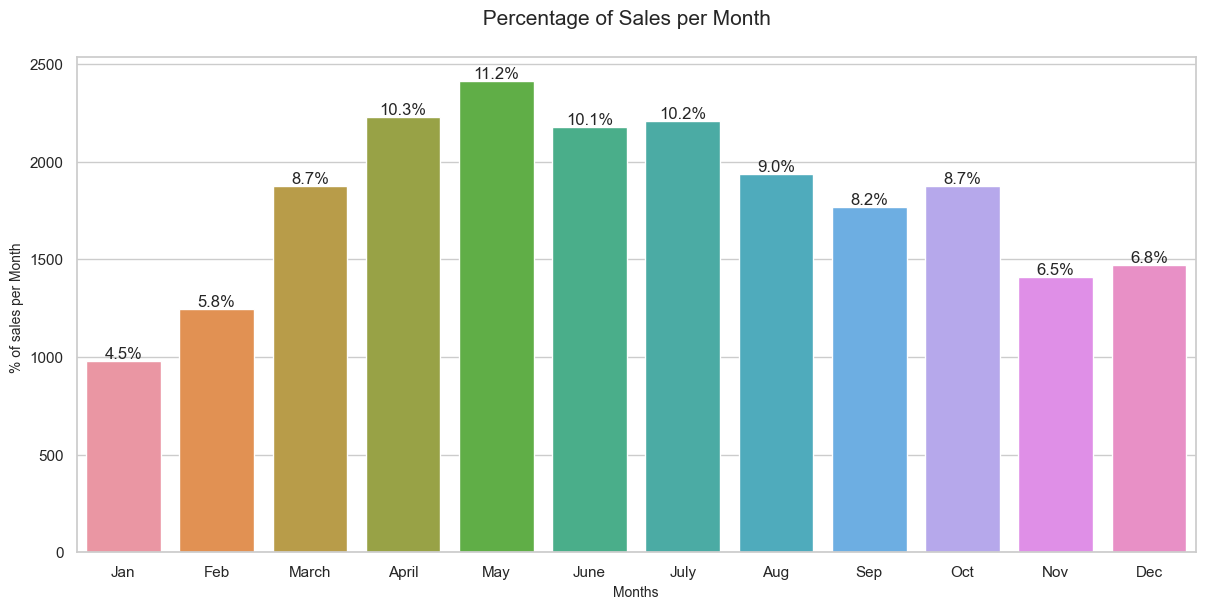

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.suptitle(' Percentage of Sales per Month', fontsize=15)
fig.tight_layout(h_pad=8)
plt.subplots_adjust(hspace=.5, wspace=.2, top=.9)

f1 = sns.countplot(x=df_import['sold_month'])
f1.set_ylabel("% of sales per Month ", fontsize=10)
f1.set_xlabel("Months", fontsize=10)
f1.set_xticks([0, 1, 2, 3, 4, 5, 6,7,8,9,10,11])
f1.set_xticklabels(labels=["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])

for p in f1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_import['sold_month']))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    f1.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


In [ ]:
grouped_data = df_import.groupby('zipcode')['price'].mean().reset_index()

#merged_data = grouped_data[['zipcode', 'price']].drop_duplicates()
grouped_data


,zipcode,price
0,98001,281194.870
1,98002,234284.035
2,98003,294111.279
3,98004,1356523.991
4,98005,810289.696
...,...,...
65,98177,676419.392
66,98178,310612.756
67,98188,289078.346
68,98198,302896.739


In [ ]:
df_import.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,sold_day,new_renovate,Age_house,new_id
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,47.511,-122.257,1340,5650,2014,10,0,Not Renovated,61,Sale equal only one
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,47.721,-122.319,1690,7639,2014,12,1,Renovated,65,Sale equal only one
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,47.738,-122.233,2720,8062,2015,2,2,NA,83,Sale equal only one
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,47.521,-122.393,1360,5000,2014,12,1,Not Renovated,51,Sale equal only one
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,47.617,-122.045,1800,7503,2015,2,2,Not Renovated,29,Sale equal only one


In [ ]:
corr_columns=["price", "sqft_living","bedrooms","zipcode","sold_year","sold_month","sold_day","new_id","Age_house"]
corr_mtrx=df_import[corr_columns].corr()
corr_mtrx


,price,sqft_living,bedrooms,zipcode,sold_year,sold_month,sold_day,Age_house
price,1.000,0.702,0.309,-0.053,0.004,-0.010,-0.002,-0.054
sqft_living,0.702,1.000,0.578,-0.200,-0.029,0.012,0.005,-0.318
bedrooms,0.309,0.578,1.000,-0.154,-0.010,-0.001,0.010,-0.156
zipcode,-0.053,-0.200,-0.154,1.000,0.001,-0.000,0.003,0.347
sold_year,0.004,-0.029,-0.010,0.001,1.000,-0.782,0.029,-0.004
sold_month,-0.010,0.012,-0.001,-0.000,-0.782,1.000,-0.048,0.006
sold_day,-0.002,0.005,0.010,0.003,0.029,-0.048,1.000,-0.007
Age_house,-0.054,-0.318,-0.156,0.347,-0.004,0.006,-0.007,1.000


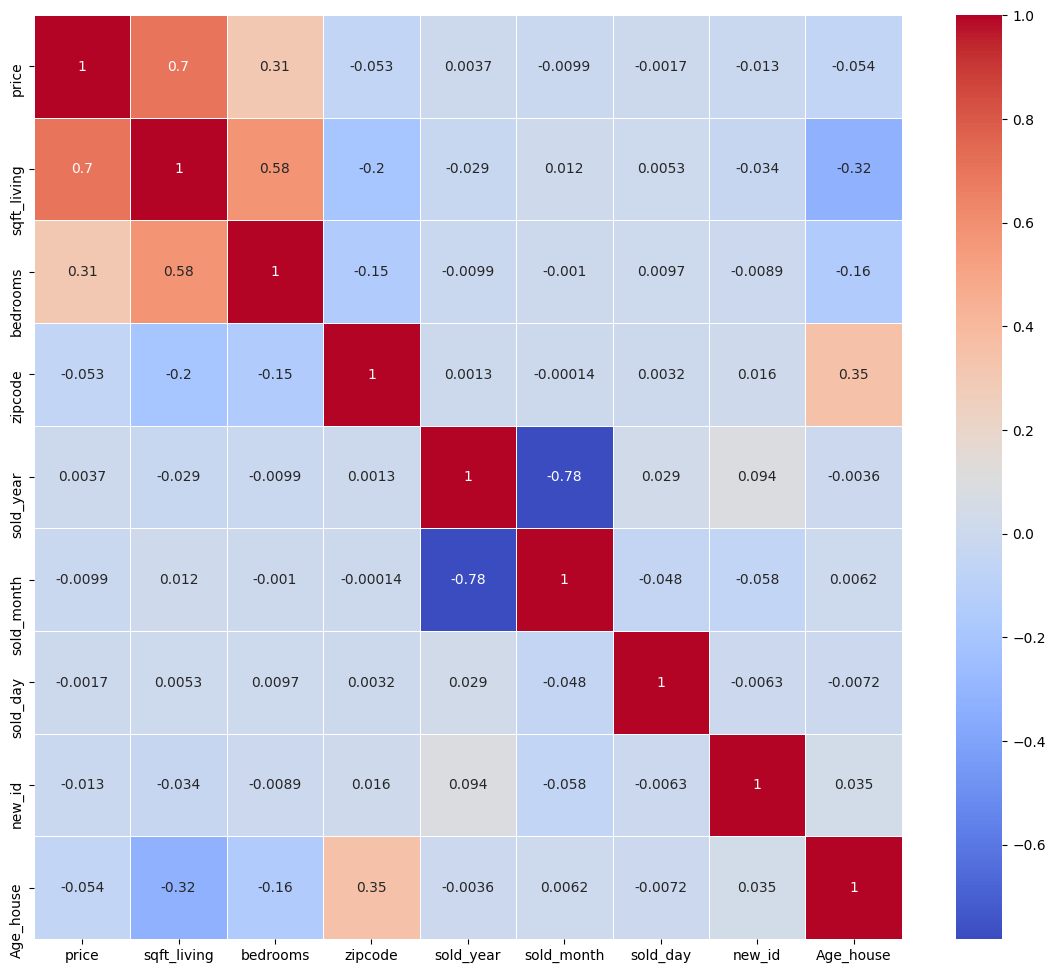

In [ ]:
map 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

## In Brief the main idea :
My stakholder Charles Christensen selling   his/her persective for  Invest with big returns, wondering about renovation?, which Neighborhood? Timing?

And more care about time because time mean return investment 
## questions
* Dose year or month or days affect selling     
....then Hypothesie which best months or day of sell
* Dose renovation of house affect  selling  .......then Hypothesie renovated good or bad renovated 
* Dose the location for zipcode and latitude and longitude affect selling ...then Hypothesie which place locations near to center or outskirt 
     
